In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [192]:
def func(x,a,tau,c):
    return a*(1-np.exp(-x/tau))+c

In [193]:
vol_er = (3.9*0.1*0.1)
vol_cyt = (4.0*0.5*0.5-vol_er)
vol_tot = vol_cyt + vol_er
N_avo=6.0221409e23

In [214]:
sm=[str(a) for a in [1,2,3,4,5]]
data={}
fit={}
for m in sm:
    data[m]=np.loadtxt('/data/kabir/output/ppf/RSnostim_750_noRYR_emptyER_sm/sm'+m+'/s_00001/dat/ca.dat')
    data[m].T[3]*=1e15/N_avo/vol_er*1e6 #micromolar
    popt,pcov=curve_fit(func,data[m].T[0],data[m].T[3],p0=[5000,10,400])
    fit[m]=popt

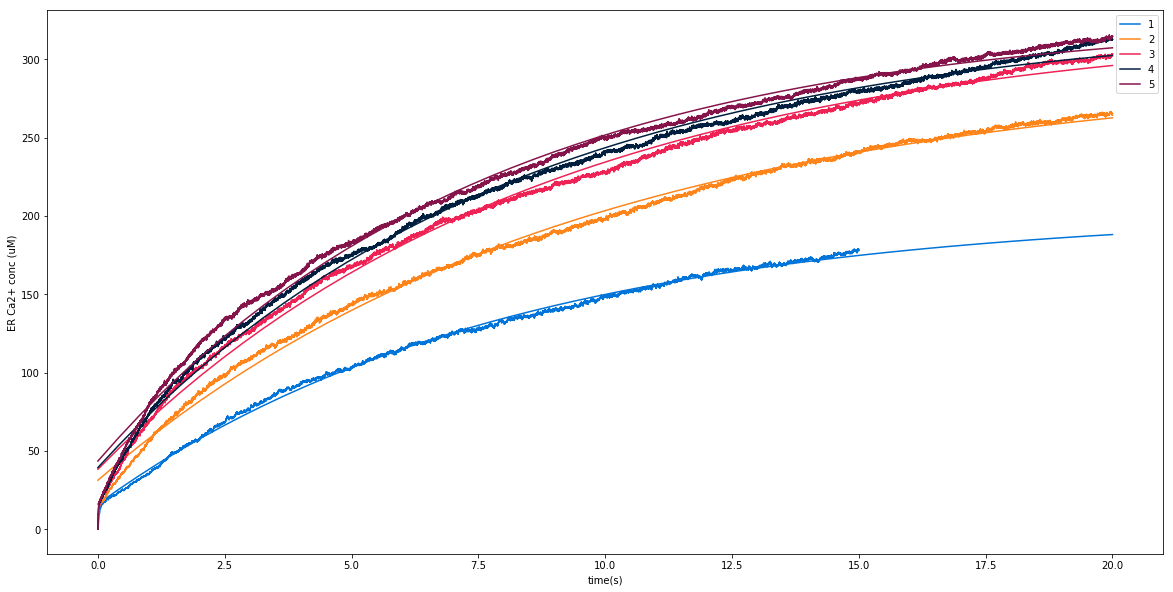

In [215]:
color=["#0074D9", "#FF851B", "#EE2255", "#001f3f", "#85144b", "#39CCCC", "#FFDC00",
       "#2ECC40", "#7FDBFF", "#B10DC9", "#3D9970", "#AAAAAA", "#000000"]
plt.figure(figsize=(20,10))

for i,m in enumerate(sm):
    plt.plot(data[m].T[0],data[m].T[3],color=color[i],label=str(m))
    xdata = np.linspace(0, 20, 50)
    plt.plot(xdata, func(xdata, *fit[m]), color=color[i])

plt.xlabel('time(s)')
plt.ylabel('ER Ca2+ conc (uM)')
    
plt.legend()
plt.savefig('/home/kabir/Project/plots/serca_multipied_refilling.png')



In [140]:
for m in sm:
    print str(m),fit[str(m)][0]+fit[str(m)][2],fit[str(m)][1]

1 4778.51727996942 7.984160882730373
2 6900.867258662566 9.377321776974984
3 7619.427731419168 8.641215089086659
4 7668.921800089462 8.049275757399375
5 7698.031564916038 7.582002335237295


In [147]:
pmca_data = np.loadtxt('/data/kabir/output/ppf/RSnostim_750_noRYR_emptyER_sm/sm'+'1'+'/s_00001/dat/pmca&leak_ca_flux.dat')
calb_data = np.loadtxt('/data/kabir/output/ppf/RSnostim_750_noRYR_emptyER_sm/sm'+'1'+'/s_00001/dat/calbindin_mol.dat')

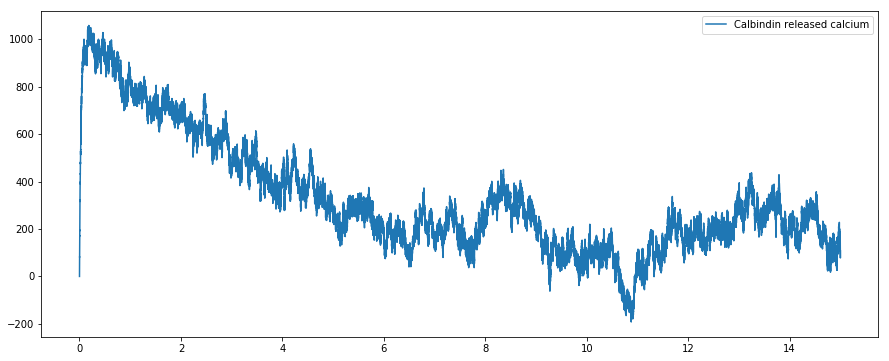

In [217]:
plt.figure(figsize=(15,6))

#plot PMCA flux
#plt.plot(pmca_data.T[0],pmca_data.T[2]-pmca_data.T[1],color=color[i],label="PMCA Flux IN(leak)-OUT")

#plot calcium released by calbindin (initial-final bound calbindin)
calb_tot=calb_data.T[2]+calb_data.T[4]+2*(calb_data.T[3]+calb_data.T[5]+calb_data.T[7])+3*(calb_data.T[6]+calb_data.T[8])+4*calb_data.T[9]
calb_rel=calb_tot[0]-calb_tot
plt.plot(pmca_data.T[0],calb_rel,label="Calbindin released calcium")
plt.legend()

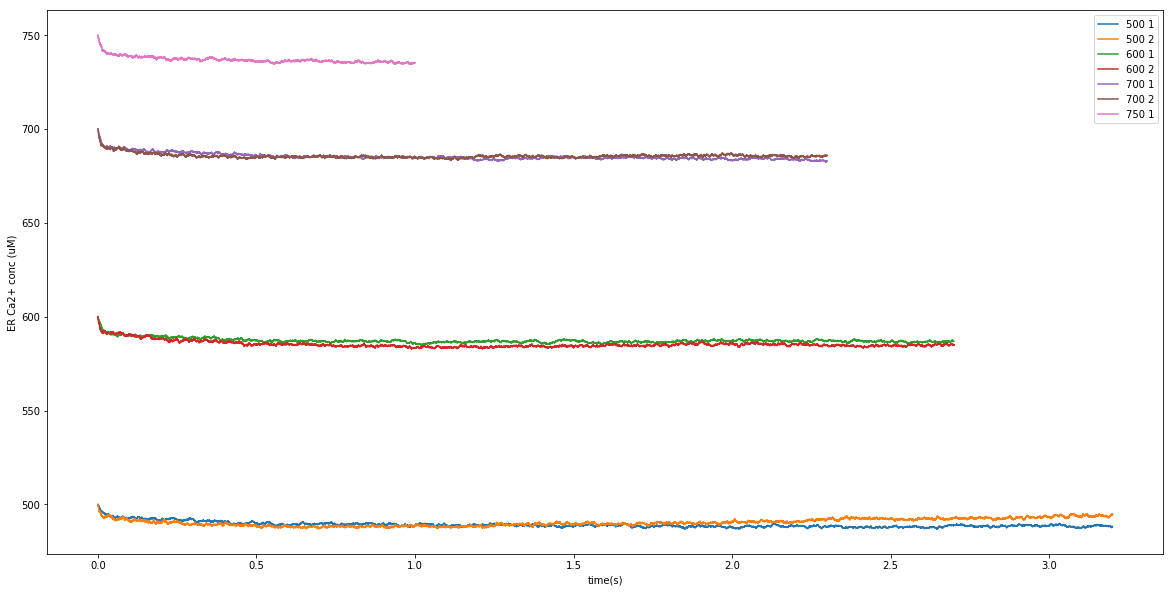

In [216]:
smultipliers=[1,2]
initial_conc=[500,600,700]

data={}
plt.figure(figsize=(20,10))
for ic in initial_conc:
    data[ic]={}
    for sm in smultipliers:
        data[ic][sm]=np.loadtxt('/data/kabir/output/ppf/RSnostim_750_init_sm/'+str(ic)+'/sm'+str(sm)+'/s_00001/dat/ca.dat')
        data[ic][sm].T[3]*=1e15/N_avo/vol_er*1e6 #micromolar
        plt.plot(data[ic][sm].T[0],data[ic][sm].T[3],label=str(ic)+" "+str(sm))
data=np.loadtxt('/data/kabir/output/ppf/old_stuff/RSnostim_750_long (copy)/s_00001/dat/ca.dat')
data.T[3]*=1e15/N_avo/vol_er*1e6 #micromolar
plt.plot(data.T[0],data.T[3],label=str(750)+" "+str(1))

plt.xlabel('time(s)')
plt.ylabel('ER Ca2+ conc (uM)')
    
plt.legend()
plt.savefig('/home/kabir/Project/plots/different_initial_conditions.png')
        